In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris(as_frame = True)

In [4]:
iris.data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [6]:
iris.data.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X_iris = iris.data[['petal length (cm)','petal width (cm)']].values
y_iris = iris.target

In [8]:
X_iris.shape , y_iris.shape

((150, 2), (150,))

In [9]:
tree_clf = DecisionTreeClassifier(max_depth = 2 , random_state = 42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [10]:
from sklearn.tree import export_graphviz

In [11]:
 export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

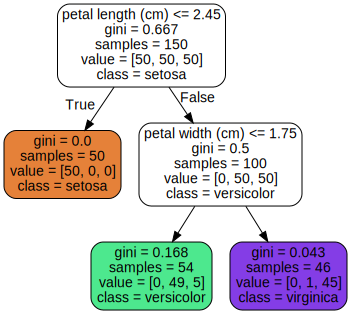

In [12]:
 from graphviz import Source
 Source.from_file("iris_tree.dot")

In [13]:
tree_clf.predict_proba([[5,1.5]]).round(2)

array([[0.  , 0.91, 0.09]])

In [14]:
tree_clf.predict([[5,1.5]])

array([1])

###### The CART Training Algorithm
 
 Scikit-Learn uses the Classification and Regression Tree (CART) algorithm
 to train decision trees (also called “growing” trees). The algorithm works by
 first splitting the training set into two subsets using a single feature k and a
 threshold t (e.g., “petal length ≤ 2.45 cm”). How does it choose k and t ? It
 searches for the pair (k, t ) that produces the purest subsets, weighted by their
 size

##### compare regularization vs non regularization

In [15]:
from sklearn.datasets import make_moons 
X_moons , y_moons = make_moons(n_samples = 150 , noise = 0.2 , random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [16]:
X_moons_test , y_moons_test = make_moons(n_samples = 1000 , noise = 0.2 ,random_state = 42 )

In [17]:
tree_clf1.score(X_moons_test,y_moons_test) , tree_clf2.score(X_moons_test ,y_moons_test )

(0.901, 0.918)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
np.random.seed(42)
X_quad = np.random.rand(200,1) - 5
y_quad = X_quad**2 + 0.025*np.random.randn(200,1)

In [20]:
tree_reg = DecisionTreeRegressor(max_depth = 2 , random_state = 42)
tree_reg.fit(X_quad ,y_quad )

DecisionTreeRegressor(max_depth=2, random_state=42)

In [21]:
 export_graphviz(
        tree_reg,
        feature_names = ['X1'],
         
        out_file="quad.dot",
        rounded=True,
        filled=True
    )

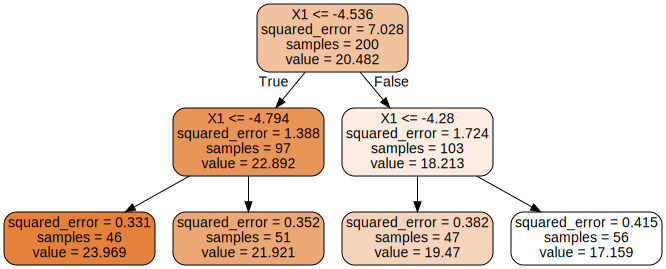

In [22]:
 from graphviz import Source
 Source.from_file("quad.dot")

In [23]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler

In [24]:
pca_pipeline = make_pipeline(StandardScaler(),PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth = 2 , random_state = 42)
tree_clf_pca.fit(X_iris_rotated , y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)